In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, gc
os.listdir('DataSet/')

['Train.csv', 'Sample_submission.csv', 'Test.csv']

In [2]:
df = pd.read_csv("DataSet/Train.csv")
df.info()

/home/ankish/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Columns: 2395 entries, Col1 to Col2397
dtypes: float64(844), int64(1548), object(3)
memory usage: 320.2+ MB


In [3]:
def reduce_mem_usage_wo_print(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    print("="*30)
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory {:.2f} MB'.format(start_mem), "==>", end=" ")
    
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                    # print(col, "== int8")
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                    # print(col, "== int16")
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                    # print(col, "== int32")
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                    # print(col, "== int64")
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                    # print(col, "== float16")
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                    # print(col, "== float32")
                else:
                    df[col] = df[col].astype(np.float64)
                    # print(col, "== float64")
        #else: df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(' {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print("="*30)
    return

In [5]:
# target = df.iloc[:,1]
# ids = df.iloc[:,0]
# df = df.iloc[:,2:]
# print(target.shape, ids.shape, df.shape)
# reduce_mem_usage_wo_print(df)

(17521,) (17521,) (17521, 2393)
Memory 319.88 MB ==>  56.91 MB
Decreased by 82.2%


In [ ]:
# df.describe()

In [ ]:
# collect = []
# for col in tf.columns:
#     collect.append(tf[col].unique().shape[0])

# plt.figure(figsize=(20,8))
# plt.plot(range(len(collect)), collect, '-o')

In [7]:
np.unique(ids).shape, ids.shape

((17521,), (17521,))

In [21]:
# np.random.randint(len(samples), shape=len(samples))

df.loc[valid].shape

(5000, 2393)

In [4]:
target.value_counts()

NameError: name 'target' is not defined

In [23]:
df['target'] = target
df.shape

(17521, 2394)

In [36]:
df.iloc[:,:100].apply(lambda x: pd.Series.value_counts(x).shape[0])

Col3      16308
Col4      16327
Col5      16325
Col6      16325
Col7      16307
Col8      16298
Col9      16327
Col10     16327
Col11     16318
Col12     16319
Col13      1566
Col14      1925
Col15      1887
Col16      1460
Col17      1251
Col18      5901
Col19      2258
Col20      2540
Col21      3671
Col22      4035
Col23      3494
Col24      4054
Col25      5796
Col26      6618
Col27      4415
Col28      1889
Col29         8
Col30         7
Col31         8
Col32        32
          ...  
Col73         8
Col74         7
Col75         7
Col76         6
Col77         6
Col78         6
Col79         6
Col80         6
Col81         6
Col82         6
Col83         6
Col84         3
Col85         3
Col86         3
Col87         3
Col88         3
Col89         3
Col90         3
Col91         3
Col92      8702
Col93      9564
Col94         9
Col95        11
Col96         9
Col97        11
Col98        10
Col99        11
Col100        8
Col101       11
Col102        8
Length: 100, dtype: int6

In [4]:
cat_cols = []
num_cols = []

for col in df.columns:
    uni_values = df[col].value_counts().shape[0]
    if uni_values <= 800:
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [5]:
cat_cols.append(num_cols[0])
num_cols.remove(num_cols[0])
print(len(cat_cols), len(num_cols))
df[cat_cols] = df[cat_cols].astype("category")
df[num_cols] = df[num_cols].astype("float")

1796 599


In [59]:
danger_cat_cols = []
danger_num_cols = []

for col in cat_cols:
    amount = df[col].isnull().sum()
    if amount > 10000:
        danger_cat_cols.append(col)

for col in num_cols:
    amount = df[col].isnull().sum()
    if amount > 10000:
        danger_num_cols.append(col)

len(danger_cat_cols), len(danger_num_cols)

(29, 189)

In [60]:
danger_cat_cols = []
danger_num_cols = []

for col in cat_cols:
    amount = df[col].isnull().sum()
    if amount > 8012:
        danger_cat_cols.append(col)

for col in num_cols:
    amount = df[col].isnull().sum()
    if amount > 8012:
        danger_num_cols.append(col)

len(danger_cat_cols), len(danger_num_cols)

(34, 189)

In [55]:
np.where(df[cat_cols].isnull().sum() > 0)

(array([  8,   9,  10,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82, 101, 102, 103, 104, 105, 106, 109, 112, 116, 117, 118, 119,
        120, 121, 124, 128, 129, 130, 131, 132, 133, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 152]),)

In [53]:
# df[cat_cols] = df[cat_cols].astype("category")

(17521, 1610)

In [39]:
df.iloc[:,:12].describe()

,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14
count,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.627200e+04,1.627700e+04
mean,3.158967e+04,2.046538e+04,2.502936e+04,2.789382e+04,2.597738e+04,3.302603e+04,2.912699e+04,2.971077e+04,3.617388e+04,3.553217e+04,inf,inf
std,7.612866e+05,7.136897e+05,6.018194e+05,6.091257e+05,7.211996e+05,7.488422e+05,2.175615e+05,2.981497e+05,2.612391e+05,2.706869e+05,1.708984e+00,1.902344e+00
min,-8.555718e+07,-8.555718e+07,-7.011954e+07,-7.100920e+07,-8.480658e+07,-9.016250e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.714844e+00,-2.773438e+00
25%,2.742337e+03,2.007863e+03,1.857013e+03,2.562647e+03,2.973188e+03,3.822170e+03,1.824148e+03,1.787456e+03,3.505288e+03,3.252484e+03,8.218750e+00,8.382812e+00
50%,9.308060e+03,6.642856e+03,6.236503e+03,8.464355e+03,1.036962e+04,1.303534e+04,5.705458e+03,5.536147e+03,8.832639e+03,8.302617e+03,9.281250e+00,9.367188e+00
75%,3.053873e+04,2.156093e+04,2.068154e+04,2.773849e+04,2.645998e+04,3.359204e+04,1.852222e+04,1.753976e+04,2.341911e+04,2.206822e+04,1.042969e+01,1.027344e+01
max,1.459355e+07,1.288980e+07,1.478068e+07,1.178075e+07,1.879882e+07,1.514035e+07,1.125630e+07,2.788633e+07,1.314762e+07,1.286534e+07,1.650000e+01,1.675000e+01


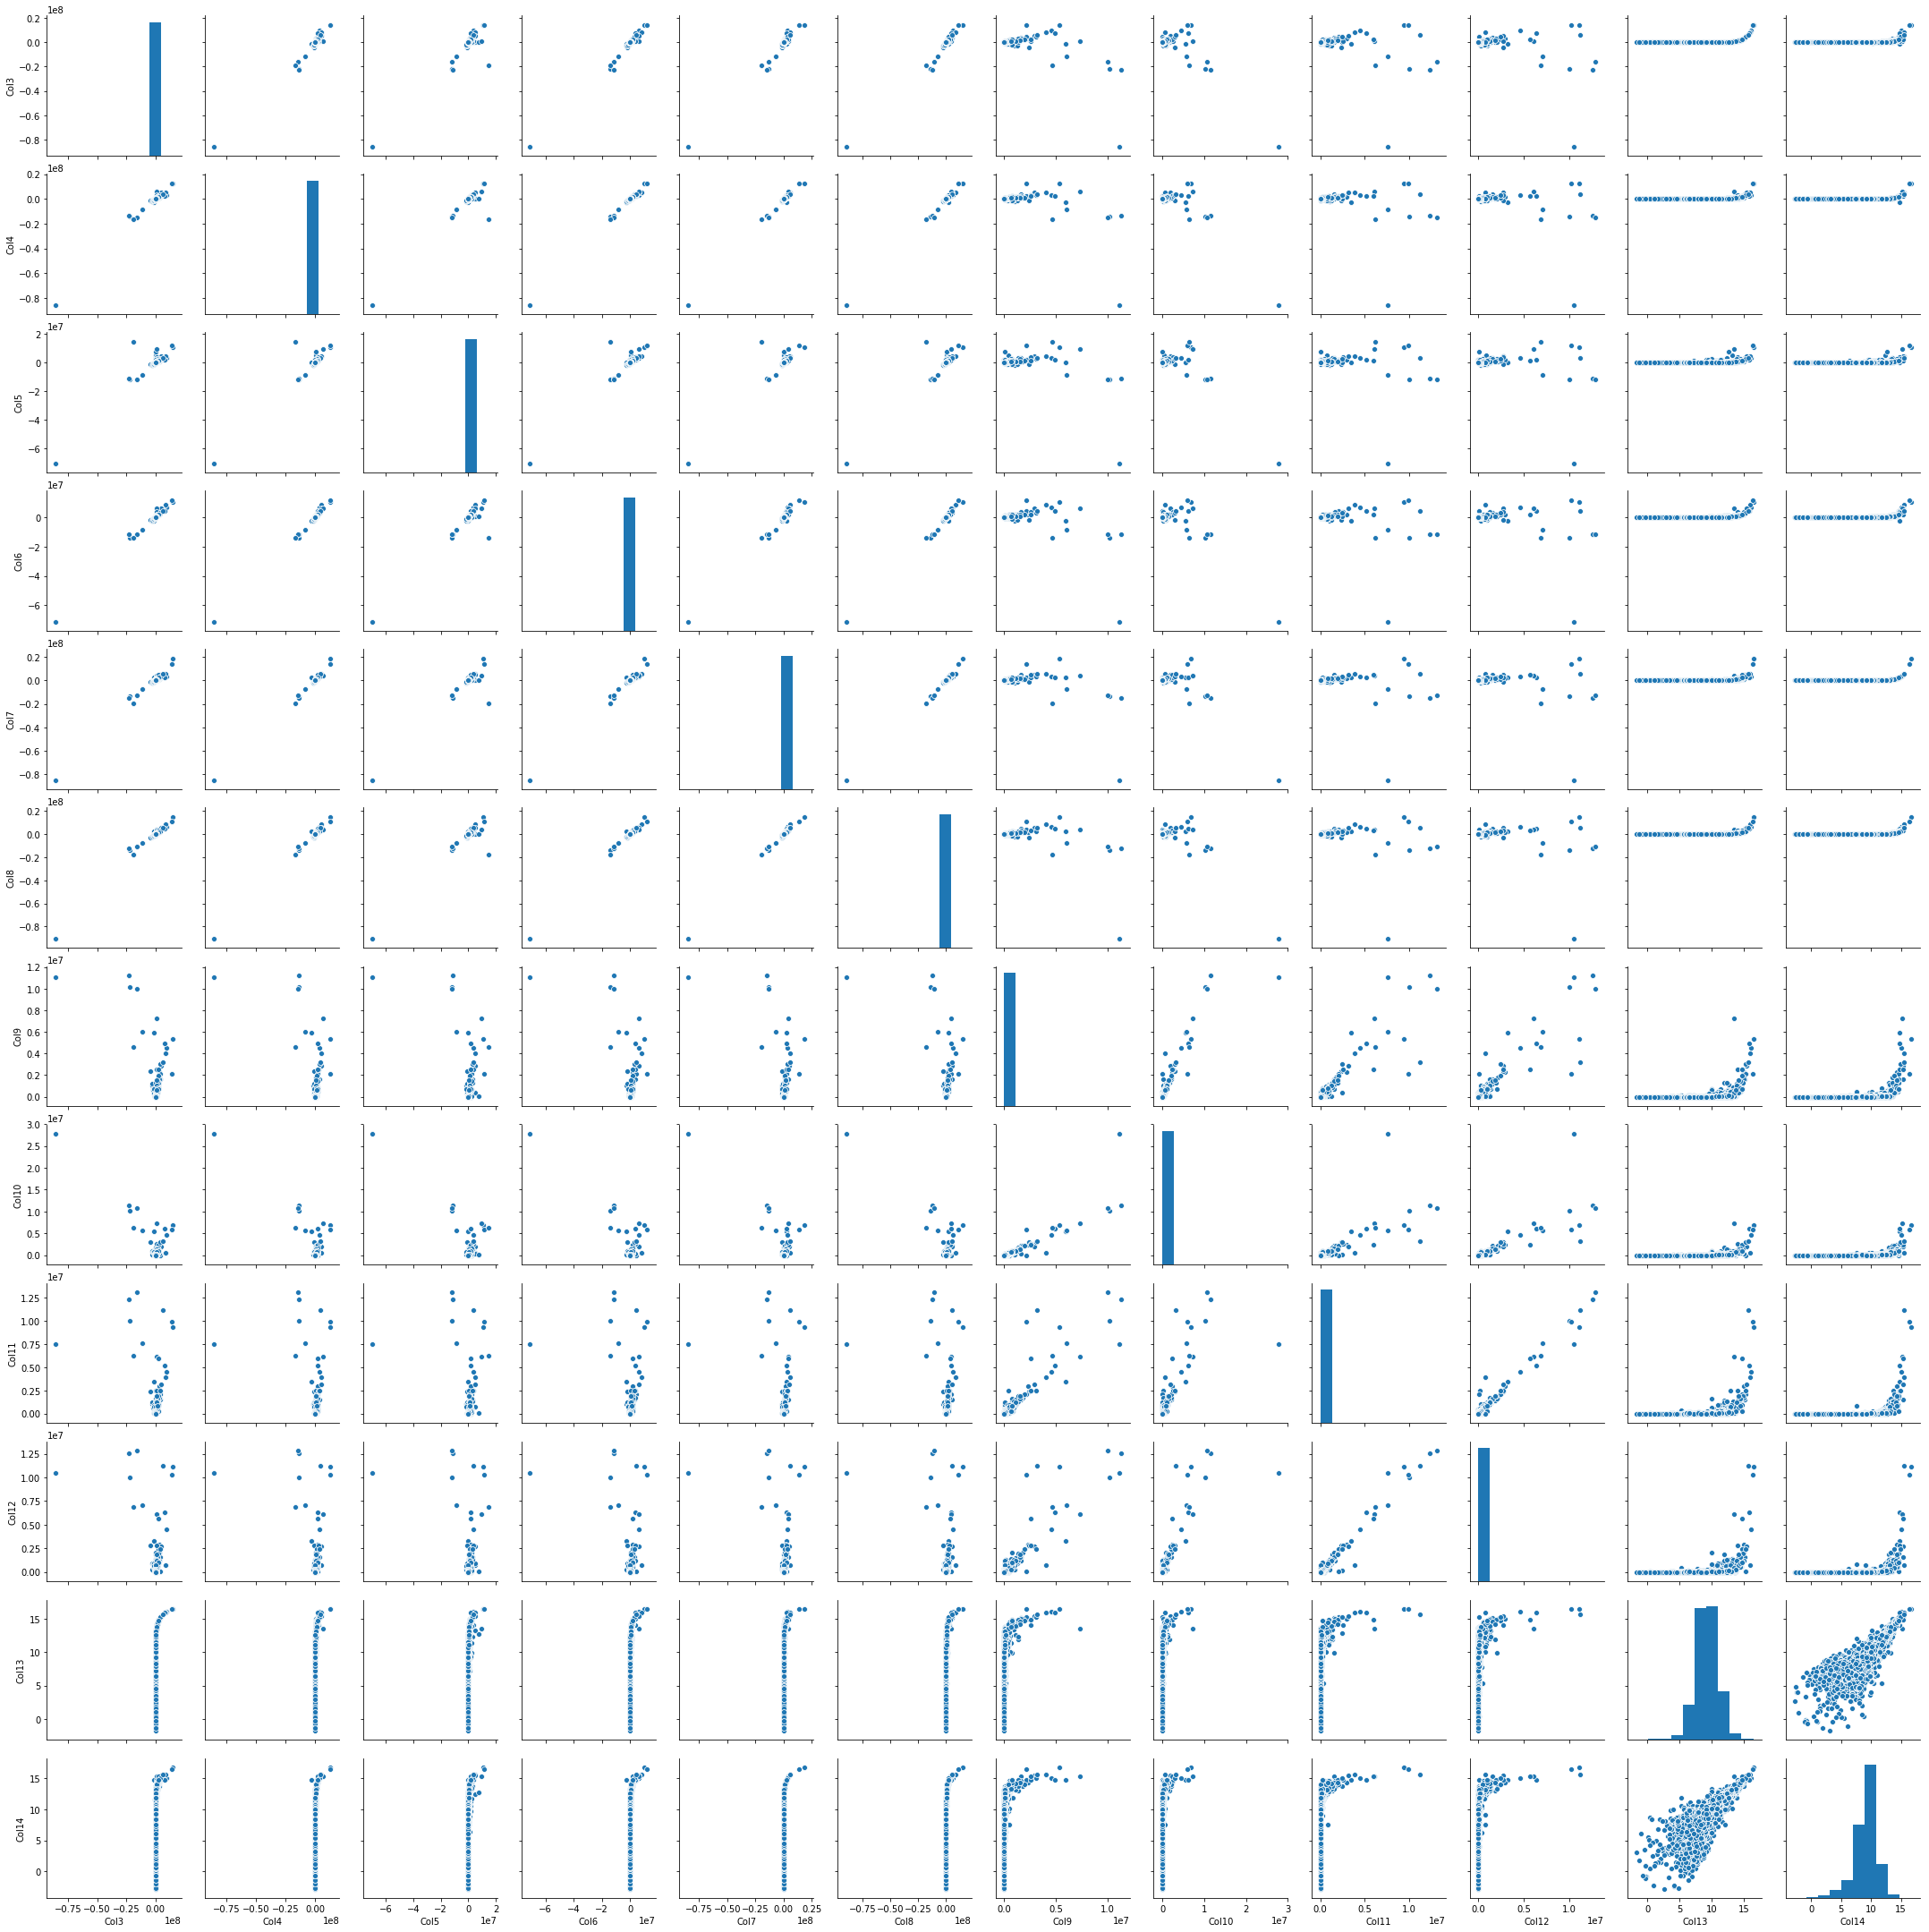

In [42]:
import seaborn as sns

sns.pairplot(df.iloc[:,:12])

In [7]:
reduce_mem_usage_wo_print(df[num_cols])

Memory 104.80 MB ==> 

/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 28.64 MB
Decreased by 72.7%


In [9]:
# df.columns

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10',
       ...
       'Col2388', 'Col2389', 'Col2390', 'Col2391', 'Col2392', 'Col2393',
       'Col2394', 'Col2395', 'Col2396', 'Col2397'],
      dtype='object', length=2395)

In [6]:
target = df['Col2']
df.drop(['Col1','Col2'], axis=1, inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(df, target,
                                            test_size=0.3, 
                                            stratify=target, 
                                            random_state=1234)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((12264, 2393), (5257, 2393), (12264,), (5257,))

## Drop columns from feature importance of last 2 ensembles

In [8]:
com1 = pd.read_csv('importance.csv')
com2 = pd.read_csv('importance_with_drop_518.csv')
com1.shape, com2.shape

((2393, 4), (1875, 4))

In [9]:
drop_cols1 = com1[com1['sca_imp'] == 0]['columns'].values
drop_cols2 = com2[com2['sca_imp'] == 0]['columns'].values
drop_cols1.shape, drop_cols2.shape

((518,), (302,))

In [15]:
for i in np.unique(com1['sca_imp']):
    print(i)

0.0
9.259960052192148e-05
9.873124982977458e-05
0.00011769841319364305
0.00013471378491570037
0.00014453766038202467
0.0001633104032860049
0.0001948445126386881
0.000206690941346331
0.00025298209436622454
0.00027387144333888597
0.00029645289504556815
0.0003043227193227988
0.00032245181593688763
0.00032272884571048113
0.00033575788568420534
0.0003573991536816539
0.0003899307769579108
0.0003928758483569799
0.0003950714391869805
0.0003966058904578042
0.00040134481710723776
0.00040394116283359627
0.0004109359790821584
0.000412488692265918
0.00044043418994945457
0.00044242950935109005
0.00046773694251151757
0.00047432464267489055
0.00047853564366125134
0.00048429257256328535
0.0004874921445255046
0.0004968521037913688
0.0005004362626283338
0.0005046488539119026
0.0005078274869608861
0.0005216081544049092
0.0005247228575061403
0.0005270701361848088
0.0005298475902581789
0.0005407377865072664
0.0005517937447353105
0.0005580289820275347
0.0005646721835634588
0.0005843740046011718
0.00060547025

In [10]:
drop_cols = list(set(drop_cols1).union(set(drop_cols2)))
len(drop_cols)

820

In [11]:
print(X_tr.shape, X_val.shape, "==>> ", end=" ")
X_tr.drop(drop_cols, axis=1, inplace=True)
X_val.drop(drop_cols, axis=1, inplace=True)
print(X_tr.shape, X_val.shape)


(12264, 2393) (5257, 2393) ==>>  (12264, 1573) (5257, 1573)


/home/ankish/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
tr = X_tr.copy()
val = X_val.copy()
tr['target'] = y_tr
val['target'] = y_val
tr.shape, val.shape

((12264, 1574), (5257, 1574))

In [22]:
import gc
# del train, valid
# gc.collect()

In [13]:
# tr = X_tr.copy()
# val = X_val.copy()
# tr['target'] = y_tr
# val['target'] = y_val
# tr.shape, val.shape

((12264, 2394), (5257, 2394))

In [13]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(nthreads=4)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/ankish/anaconda3/h2o_jar/h2o.jar
  Ice root: /tmp/tmp0y1mmwvs
  JVM stdout: /tmp/tmp0y1mmwvs/h2o_ankish_started_from_python.out
  JVM stderr: /tmp/tmp0y1mmwvs/h2o_ankish_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,"1 year, 6 months and 17 days !!!"
H2O cluster name:,H2O_from_python_ankish_pu2a5w
H2O cluster total nodes:,1
H2O cluster free memory:,2.590 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [14]:
# samples = np.random.randint(0,df.shape[0], size=df.shape[0])
# samples = np.random.permutation(samples)
# valid = samples[:5000]
# train = samples[5000:]
# valid.shape, train.shape

try:
    del train, valid
    gc.collect()
    print("deleted prev dataset")
except:
    print("dataset doesn't exist previously")
train = h2o.H2OFrame(tr)
valid  = h2o.H2OFrame(val)
print(train.shape, valid.shape)


x = X_tr.columns
y = "target"
x = list(x)
# x.remove(y)

del tr, val
gc.collect()

# ignored_columns = ['UniqueID']
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()


dataset doesn't exist previously


/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
(12264, 1574) (5257, 1574)


In [15]:
17*60*60

61200

In [39]:
aml = H2OAutoML(max_models=25, seed=1337, max_runtime_secs=600, nfolds=4)
aml.train(x = x, y = y, training_frame = train, leaderboard_frame = valid)
lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id,auc,logloss
StackedEnsemble_AllModels_0_AutoML_20190922_145323,0.724824,0.295017
StackedEnsemble_BestOfFamily_0_AutoML_20190922_145323,0.724824,0.295017
GLM_grid_0_AutoML_20190922_145323_model_0,0.724642,0.295828
XRT_0_AutoML_20190922_145323,0.687359,0.304417
DRF_0_AutoML_20190922_145323,0.662487,0.317677
GBM_grid_0_AutoML_20190922_145323_model_0,0.635505,0.329261


In [16]:
gc.collect()

0

In [17]:
aml = H2OAutoML(max_models=500, seed=1337, max_runtime_secs=61200, nfolds=4)
aml.train(x = x, y = y, training_frame = train, leaderboard_frame = valid)
lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |████████████████████████████████████████████████████████

H2OServerError: HTTP 500 Server Error:
'Error: 500'

In [17]:
lb[:,"model_id"]

model_id
GLM_grid_0_AutoML_20190921_133956_model_0
StackedEnsemble_AllModels_0_AutoML_20190921_133956
StackedEnsemble_BestOfFamily_0_AutoML_20190921_133956
XRT_0_AutoML_20190921_133956
DRF_0_AutoML_20190921_133956
GBM_grid_0_AutoML_20190921_133956_model_0
GBM_grid_0_AutoML_20190921_133956_model_1


In [23]:
m = h2o.get_model(lb[0, "model_id"])

In [1]:
m.std_coef_plot()

NameError: name 'm' is not defined

In [90]:
m__ = h2o.get_model(lb[3, "model_id"])
m__

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_0_AutoML_20190921_133956


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.08878717489152668
RMSE: 0.29797176861495905
LogLoss: 0.31572563121775415
Mean Per-Class Error: 0.3865057671519506
AUC: 0.655563085770781
Gini: 0.3111261715415621
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16563385697502966: 


,0,1,Error,Rate
0,7425.0,1406.0,0.1592,(1406.0/8831.0)
1,650.0,346.0,0.6526,(650.0/996.0)
Total,8075.0,1752.0,0.2092,(2056.0/9827.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1656339,0.2518195,203.0
max f2,0.0650465,0.3977330,328.0
max f0point5,0.2779974,0.2424906,118.0
max accuracy,0.5686992,0.8989519,18.0
max precision,0.6466895,0.625,7.0
max recall,0.0252315,1.0,395.0
max specificity,0.8530529,0.9998868,0.0
max absolute_mcc,0.1656339,0.1483763,203.0
max min_per_class_accuracy,0.0956665,0.6066131,284.0
max mean_per_class_accuracy,0.0888340,0.6134942,295.0


Gains/Lift Table: Avg response rate: 10.14 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100743,0.4491035,3.8867896,3.8867896,0.3939394,0.3939394,0.0391566,0.0391566,288.6789583,288.6789583
,2,0.0200468,0.3806882,2.8189902,3.3556001,0.2857143,0.3401015,0.0281124,0.0672691,181.8990247,235.5600065
,3,0.0300193,0.3396464,2.8189902,3.1773365,0.2857143,0.3220339,0.0281124,0.0953815,181.8990247,217.7336465
,4,0.0400936,0.3090482,2.1925480,2.9298896,0.2222222,0.2969543,0.0220884,0.1174699,119.2547970,192.9889609
,5,0.0500661,0.2870297,2.5169556,2.8476385,0.2551020,0.2886179,0.0251004,0.1425703,151.6955577,184.7638522
,6,0.1000305,0.2185622,1.6879494,2.2683838,0.1710794,0.2299084,0.0843373,0.2269076,68.7949353,126.8383810
,7,0.1499949,0.1803971,1.3865298,1.9746319,0.1405295,0.2001357,0.0692771,0.2961847,38.6529826,97.4631906
,8,0.2000611,0.1539704,1.4639268,1.8468258,0.1483740,0.1871821,0.0732932,0.3694779,46.3926846,84.6825757
,9,0.2999898,0.1159850,1.1152523,1.6031334,0.1130346,0.1624830,0.1114458,0.4809237,11.5252251,60.3133361
,10,0.4000204,0.0978892,1.0438580,1.4632790,0.1057986,0.1483083,0.1044177,0.5853414,4.3858036,46.3278962




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.08469403327686281
RMSE: 0.2910223930849013
LogLoss: 0.3038028931833529
Mean Per-Class Error: 0.3668987341772152
AUC: 0.6628634445723054
Gini: 0.3257268891446108
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19304750468581916: 


,0,1,Error,Rate
0,1974.0,226.0,0.1027,(226.0/2200.0)
1,167.0,70.0,0.7046,(167.0/237.0)
Total,2141.0,296.0,0.1613,(393.0/2437.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1930475,0.2626642,134.0
max f2,0.0787731,0.4036067,296.0
max f0point5,0.2310066,0.2557673,100.0
max accuracy,0.6344651,0.9031596,0.0
max precision,0.6344651,1.0,0.0
max recall,0.0357162,1.0,394.0
max specificity,0.6344651,1.0,0.0
max absolute_mcc,0.1930475,0.1747263,134.0
max min_per_class_accuracy,0.1009032,0.5881818,254.0
max mean_per_class_accuracy,0.0970695,0.6331013,261.0


Gains/Lift Table: Avg response rate:  9.73 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102585,0.3699940,4.5243882,4.5243882,0.44,0.44,0.0464135,0.0464135,352.4388186,352.4388186
,2,0.0201067,0.3314270,3.4275668,3.9871696,0.3333333,0.3877551,0.0337553,0.0801688,242.7566807,298.7169551
,3,0.0303652,0.3092025,2.4678481,3.4738853,0.24,0.3378378,0.0253165,0.1054852,146.7848101,247.3885278
,4,0.0402134,0.2883301,1.2853376,2.9379144,0.125,0.2857143,0.0126582,0.1181435,28.5337553,193.7914406
,5,0.0500616,0.2706598,1.2853376,2.6128173,0.125,0.2540984,0.0126582,0.1308017,28.5337553,161.2817320
,6,0.1001231,0.2069959,2.1913952,2.4021062,0.2131148,0.2336066,0.1097046,0.2405063,119.1395172,140.2106246
,7,0.1501847,0.1728354,1.7699730,2.1913952,0.1721311,0.2131148,0.0886076,0.3291139,76.9973023,119.1395172
,8,0.2002462,0.1471176,1.2642664,1.9596130,0.1229508,0.1905738,0.0632911,0.3924051,26.4266445,95.9612990
,9,0.2999590,0.1151853,1.0155754,1.6457947,0.0987654,0.1600547,0.1012658,0.4936709,1.5575350,64.5794732
,10,0.4337300,0.1009053,1.2616810,1.5273264,0.1226994,0.1485336,0.1687764,0.6624473,26.1681033,52.7326364




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.08587127235271136
RMSE: 0.29303800496302757
LogLoss: 0.3052809268588431
Mean Per-Class Error: 0.3616461088380245
AUC: 0.6893117709201658
Gini: 0.37862354184033165
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16316073444134568: 


,0,1,Error,Rate
0,7514.0,1317.0,0.1491,(1317.0/8831.0)
1,597.0,399.0,0.5994,(597.0/996.0)
Total,8111.0,1716.0,0.1948,(1914.0/9827.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1631607,0.2942478,198.0
max f2,0.0879167,0.4140608,299.0
max f0point5,0.2171044,0.2910513,148.0
max accuracy,0.4348612,0.8991554,29.0
max precision,0.6402860,1.0,0.0
max recall,0.0320620,1.0,398.0
max specificity,0.6402860,1.0,0.0
max absolute_mcc,0.2115209,0.2083621,154.0
max min_per_class_accuracy,0.1140837,0.6365462,259.0
max mean_per_class_accuracy,0.1147083,0.6383539,258.0


Gains/Lift Table: Avg response rate: 10.14 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100743,0.3849163,4.6840798,4.6840798,0.4747475,0.4747475,0.0471888,0.0471888,368.4079753,368.4079753
,2,0.0200468,0.3327895,4.2284854,4.4574389,0.4285714,0.4517766,0.0421687,0.0893574,322.8485370,345.7438893
,3,0.0300193,0.3082499,2.4162774,3.7793581,0.2448980,0.3830508,0.0240964,0.1134538,141.6277354,277.9358110
,4,0.0400936,0.2855003,2.6908543,3.5058508,0.2727273,0.3553299,0.0271084,0.1405622,169.0854326,250.5850814
,5,0.0500661,0.2657408,2.7183120,3.3489833,0.2755102,0.3394309,0.0271084,0.1676707,171.8312024,234.8983332
,6,0.1000305,0.2099245,2.3510723,2.8505354,0.2382892,0.2889115,0.1174699,0.2851406,135.1072314,185.0535407
,7,0.1499949,0.1740129,1.3262459,2.3427836,0.1344196,0.2374491,0.0662651,0.3514056,32.6245921,134.2783618
,8,0.2000611,0.1512413,1.5040344,2.1328830,0.1524390,0.2161750,0.0753012,0.4267068,50.4034430,113.2883007
,9,0.2999898,0.1321408,1.1152523,1.7939029,0.1130346,0.1818182,0.1114458,0.5381526,11.5252251,79.3902884
,10,0.4000204,0.1113312,1.0338209,1.6038341,0.1047813,0.1625541,0.1034137,0.6415663,3.3820940,60.3834059



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
accuracy,0.8112375,0.0163296,0.8049451,0.7866300,0.8421374
auc,0.6897679,0.0116384,0.7077286,0.6936100,0.6679650
err,0.1887625,0.0163296,0.1950550,0.2133700,0.1578626
err_count,618.3333,53.54541,639.0,699.0,517.0
f0point5,0.2624174,0.0084472,0.2550261,0.2529566,0.2792696
f1,0.2976217,0.0056135,0.3001095,0.305859,0.2868966
f2,0.3487493,0.0276506,0.3645556,0.3867403,0.2949518
lift_top_group,5.29792,0.7042267,4.9328065,6.6585364,4.3024173
logloss,0.3052823,0.0066803,0.2969645,0.3003863,0.3184959
max_per_class_error,0.6014813,0.0505941,0.5745342,0.5304878,0.6994219


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2019-09-21 13:45:26,1 min 50.418 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2019-09-21 13:45:28,1 min 51.783 sec,1.0,0.3369629,1.5855568,0.5860916,1.6957988,0.4017832,0.3424944,1.6837186,0.5764269,1.4529903,0.3184243
,2019-09-21 13:45:29,1 min 53.031 sec,2.0,0.3330119,1.4050214,0.5829261,1.8952533,0.3506449,0.3225662,0.5802367,0.5974118,1.3710267,0.2892901
,2019-09-21 13:45:30,1 min 54.401 sec,3.0,0.3341779,1.3698614,0.5742853,2.3847856,0.3106493,0.3130123,0.3944563,0.6117674,1.5233630,0.2892901
,2019-09-21 13:45:35,1 min 58.927 sec,7.0,0.3196145,0.6657213,0.6092798,2.4915318,0.3236391,0.3021271,0.3230689,0.6288186,2.4678481,0.3467378
,2019-09-21 13:45:39,2 min 3.533 sec,11.0,0.3090193,0.4541797,0.6250609,3.4881445,0.2986268,0.2987767,0.3189597,0.6233333,2.4678481,0.4070579
,2019-09-21 13:45:44,2 min 7.894 sec,15.0,0.3028784,0.3409023,0.6467331,3.4881445,0.2519100,0.2956644,0.3127826,0.6378730,3.7017722,0.4144440
,2019-09-21 13:45:48,2 min 12.295 sec,19.0,0.3010492,0.3248074,0.6482075,3.4881445,0.3543660,0.2946850,0.3107707,0.6441427,3.2904641,0.2527698
,2019-09-21 13:45:53,2 min 16.957 sec,23.0,0.2996933,0.3224542,0.6509091,4.0861121,0.3087412,0.2935771,0.3090276,0.6466887,4.5243882,0.2330735
,2019-09-21 13:45:57,2 min 21.660 sec,27.0,0.2989606,0.3178104,0.6518467,3.1891607,0.2130864,0.2922429,0.3062765,0.6545416,4.1130802,0.2064013


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Col141,939.8324585,1.0,0.0501948
Col157,731.3118896,0.7781301,0.0390581
Col770,681.7686768,0.7254151,0.0364121
Col146,632.1630249,0.6726337,0.0337627
Col142,614.7587891,0.6541153,0.0328332
---,---,---,---
Col2381,0.0,0.0,0.0
Col2382,0.0,0.0,0.0
Col2383,0.0,0.0,0.0
Col2385,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [55]:
m1 = h2o.get_model(lb[1, "model_id"])
m2 = h2o.get_model(lb[2, "model_id"])
m3 = h2o.get_model(lb[3, "model_id"])
m4 = h2o.get_model(lb[4, "model_id"])
m5 = h2o.get_model(lb[5, "model_id"])
m6 = h2o.get_model(lb[6, "model_id"])


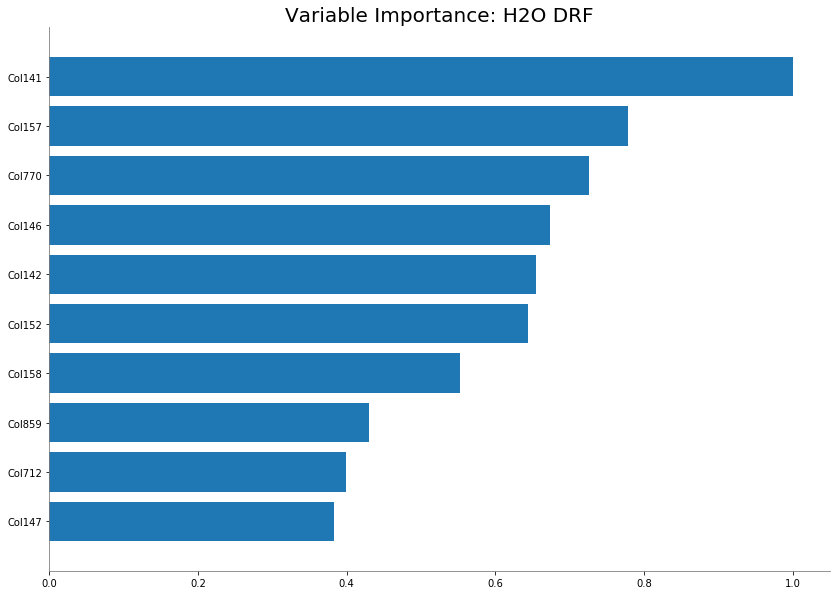

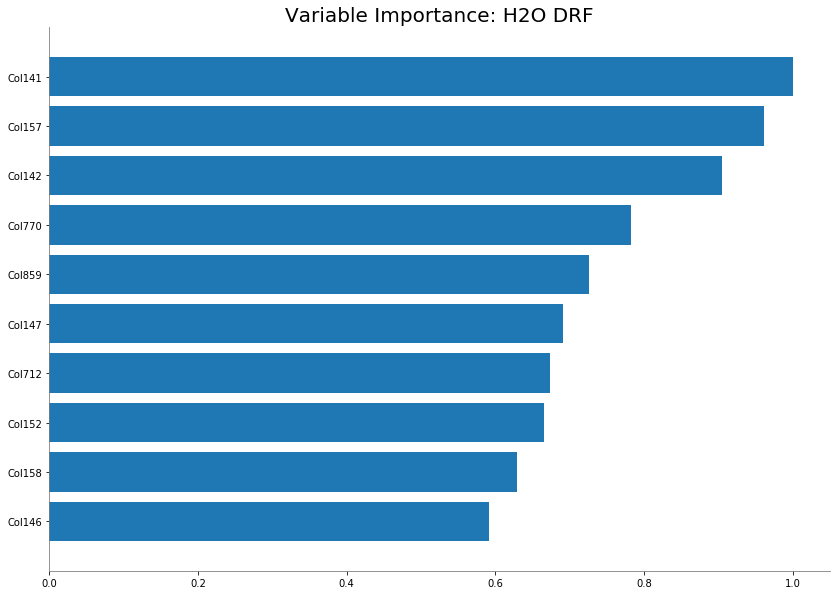

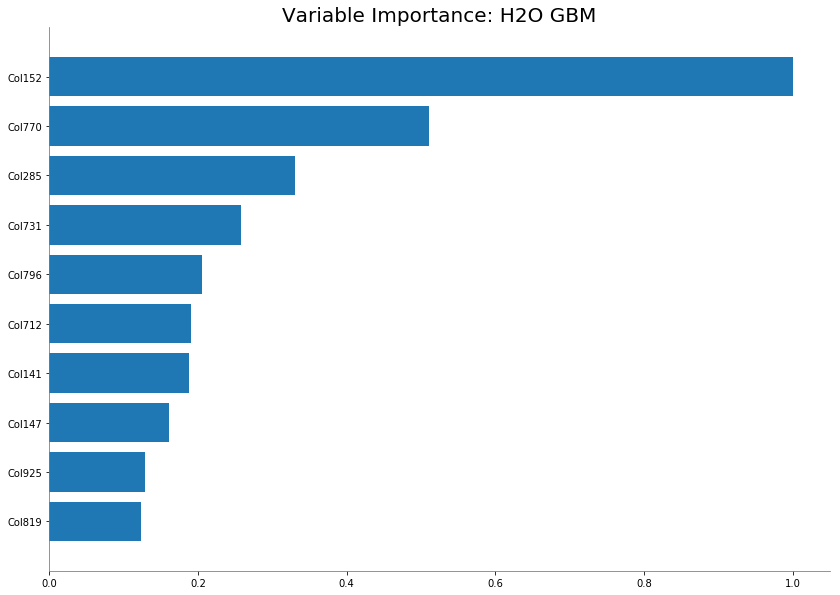

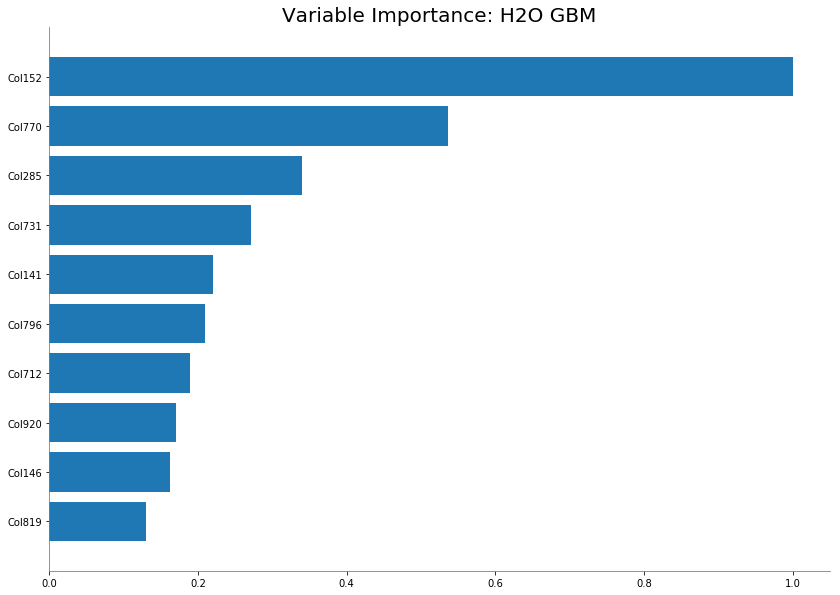

In [67]:
m3.varimp_plot()
m4.varimp_plot()
m5.varimp_plot()
m6.varimp_plot()


In [ ]:
m3.varimp_plot()
m4.varimp_plot()
m5.varimp_plot()
m6.varimp_plot()


In [83]:
# variable 	relative_importance 	scaled_importance 	percentage

m3 = pd.DataFrame(m3.varimp(), columns=['col_name','first','sec','third'])
m4 = pd.DataFrame(m4.varimp(), columns=['col_name','first','sec','third'])
m5 = pd.DataFrame(m5.varimp(), columns=['col_name','first','sec','third'])
m6 = pd.DataFrame(m6.varimp(), columns=['col_name','first','sec','third'])


m3 = m3.sort_values(by='col_name')
m4 = m4.sort_values(by='col_name')
m5 = m5.sort_values(by='col_name')
m6 = m6.sort_values(by='col_name')

combine = pd.DataFrame()

combine['columns'] = m3['col_name']
combine['rel_imp'] = m3['first'] + m4['first'] + m5['first'] + m6['first']
combine['sca_imp'] = m3['sec'] + m4['sec'] + m5['sec'] + m6['sec']
combine['percentage'] = m3['third'] + m4['third'] + m5['third'] + m6['third']

combine

,columns,rel_imp,sca_imp,percentage
1548,Col10,0.882245,0.001569,0.000048
1372,Col100,1.968035,0.002965,0.000107
577,Col1000,7.706653,0.011472,0.000418
1465,Col1001,1.466792,0.002252,0.000080
1738,Col1002,0.666667,0.001186,0.000036
720,Col1003,6.068012,0.009089,0.000329
1739,Col1004,0.666667,0.001186,0.000036
1740,Col1005,0.666667,0.001186,0.000036
1028,Col1006,3.632738,0.005441,0.000197
1741,Col1007,0.666667,0.001186,0.000036


In [95]:
combine.sort_values(by='sca_imp', ascending=False)

,columns,rel_imp,sca_imp,percentage
0,Col141,2482.739746,4.000000,0.492573
1,Col157,1784.627121,2.785223,0.283858
2,Col770,1518.903397,2.299982,0.202071
3,Col146,1331.083359,1.983335,0.166641
4,Col142,1231.580109,1.805627,0.142803
5,Col152,1189.940491,1.735086,0.135963
6,Col158,1082.997391,1.603169,0.126155
7,Col859,941.143074,1.427708,0.110457
8,Col712,872.583519,1.321074,0.099557
9,Col147,816.666000,1.227485,0.089500


In [96]:
combine.sort_values(by='percentage', ascending=False)

,columns,rel_imp,sca_imp,percentage
0,Col141,2482.739746,4.000000,0.492573
1,Col157,1784.627121,2.785223,0.283858
2,Col770,1518.903397,2.299982,0.202071
3,Col146,1331.083359,1.983335,0.166641
4,Col142,1231.580109,1.805627,0.142803
5,Col152,1189.940491,1.735086,0.135963
6,Col158,1082.997391,1.603169,0.126155
7,Col859,941.143074,1.427708,0.110457
8,Col712,872.583519,1.321074,0.099557
9,Col147,816.666000,1.227485,0.089500


In [97]:
combine.sort_values(by='rel_imp', ascending=False)

,columns,rel_imp,sca_imp,percentage
0,Col141,2482.739746,4.000000,0.492573
1,Col157,1784.627121,2.785223,0.283858
2,Col770,1518.903397,2.299982,0.202071
3,Col146,1331.083359,1.983335,0.166641
4,Col142,1231.580109,1.805627,0.142803
5,Col152,1189.940491,1.735086,0.135963
6,Col158,1082.997391,1.603169,0.126155
7,Col859,941.143074,1.427708,0.110457
8,Col712,872.583519,1.321074,0.099557
9,Col147,816.666000,1.227485,0.089500


In [98]:
combine.to_csv('importance.csv', index=None)

In [130]:
drop_cols = combine[combine['sca_imp'] == 0]['columns'].values
drop_cols

array(['Col1338', 'Col1340', 'Col1342', 'Col1343', 'Col1348', 'Col1349',
       'Col1351', 'Col1354', 'Col1355', 'Col1356', 'Col1358', 'Col1362',
       'Col1363', 'Col1366', 'Col1367', 'Col1368', 'Col1375', 'Col1379',
       'Col1380', 'Col1382', 'Col1383', 'Col1384', 'Col1385', 'Col1387',
       'Col1388', 'Col1389', 'Col1391', 'Col1397', 'Col1399', 'Col1400',
       'Col1402', 'Col1403', 'Col1404', 'Col1406', 'Col1407', 'Col1411',
       'Col1414', 'Col1415', 'Col1417', 'Col1419', 'Col1420', 'Col1421',
       'Col1422', 'Col1423', 'Col1428', 'Col1430', 'Col1431', 'Col1432',
       'Col1433', 'Col1436', 'Col1437', 'Col1438', 'Col1439', 'Col1440',
       'Col1442', 'Col1443', 'Col1444', 'Col1446', 'Col1447', 'Col1448',
       'Col1451', 'Col1453', 'Col1456', 'Col1457', 'Col1462', 'Col1468',
       'Col1469', 'Col1472', 'Col1473', 'Col1474', 'Col1478', 'Col1484',
       'Col1487', 'Col1488', 'Col1492', 'Col1493', 'Col1494', 'Col1496',
       'Col1497', 'Col1499', 'Col1500', 'Col1502', 

In [118]:
100/df.shape[1]

0.041788549937317176

In [121]:
# combine[combine['sca_imp'] > 0.01].shape
combine1 = combine.copy()

In [122]:
del train, valid
gc.collect()

1826

In [127]:
tr = X_tr.copy()
val = X_val.copy()
tr['target'] = y_tr
val['target'] = y_val
tr.shape, val.shape

((12264, 2394), (5257, 2394))

In [131]:
print(tr.shape, val.shape, "= => ", end="")
tr.drop(drop_cols, axis=1, inplace=True)
val.drop(drop_cols, axis=1, inplace=True)
print(tr.shape, val.shape)


(12264, 2394) (5257, 2394) = => (12264, 1876) (5257, 1876)


In [143]:
2394 - 1876

518

In [133]:
train = h2o.H2OFrame(tr)
valid  = h2o.H2OFrame(val)
print(train.shape, valid.shape)


x = tr.columns
y = "target"
x = list(x)
x.remove(y)

del tr, val
gc.collect()

# ignored_columns = ['UniqueID']
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()


/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
(12264, 1876) (5257, 1876)


In [136]:
aml = H2OAutoML(max_models=5, seed=1337, max_runtime_secs=900, nfolds=3)
aml.train(x = x, y = y, training_frame = train, leaderboard_frame = valid)
lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id,auc,logloss
StackedEnsemble_BestOfFamily_0_AutoML_20190921_143941,0.728468,0.296374
StackedEnsemble_AllModels_0_AutoML_20190921_143941,0.728442,0.296432
GLM_grid_0_AutoML_20190921_143941_model_0,0.726405,0.296283
XRT_0_AutoML_20190921_143941,0.695816,0.302154
DRF_0_AutoML_20190921_143941,0.675075,0.312737
GBM_grid_0_AutoML_20190921_143941_model_0,0.655359,0.326618
GBM_grid_0_AutoML_20190921_143941_model_1,0.641445,0.330101


In [137]:
m3 = h2o.get_model(lb[3, "model_id"])
m4 = h2o.get_model(lb[4, "model_id"])
m5 = h2o.get_model(lb[5, "model_id"])
m6 = h2o.get_model(lb[6, "model_id"])


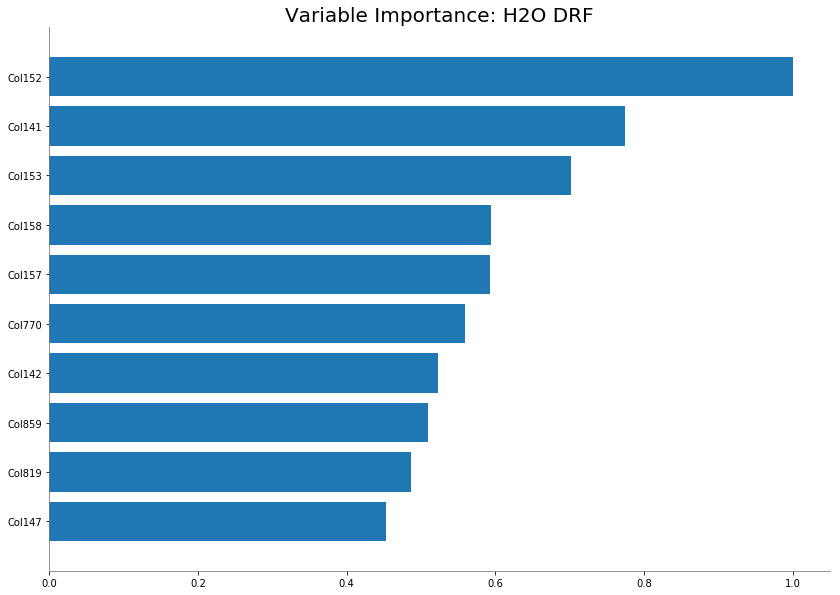

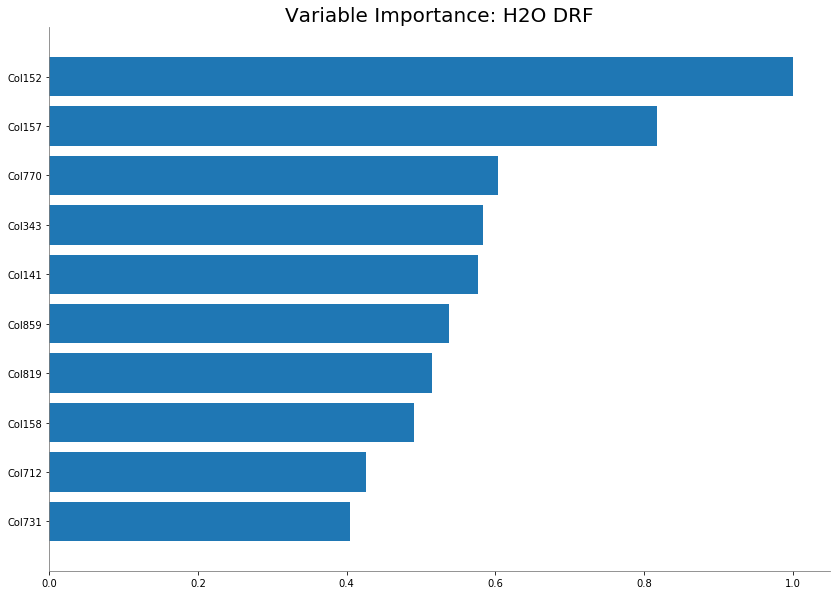

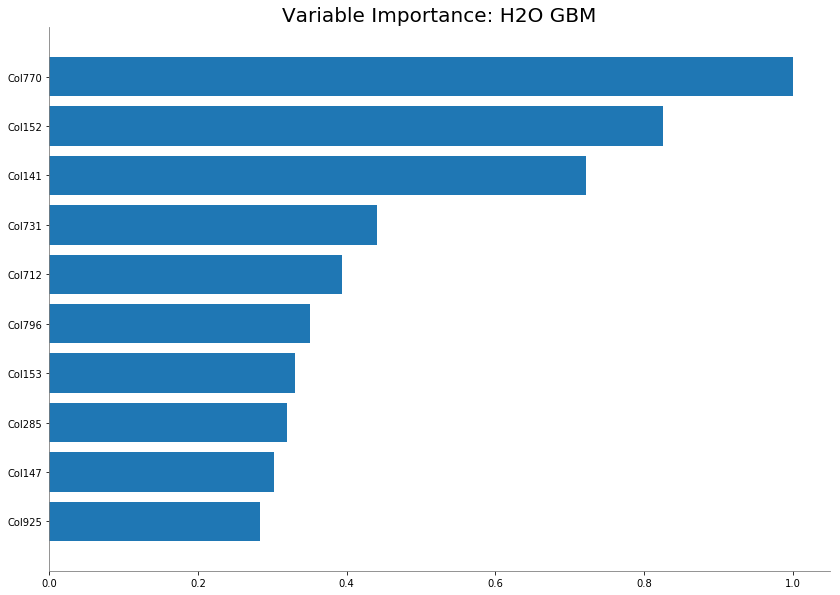

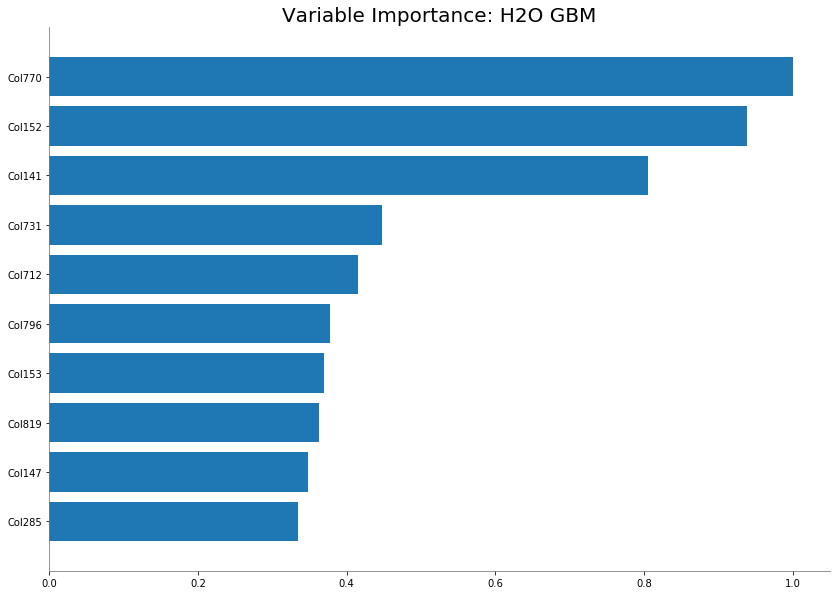

In [139]:
m3.varimp_plot(num_of_features=10)
m4.varimp_plot(num_of_features=10)
m5.varimp_plot(num_of_features=10)
m6.varimp_plot(num_of_features=10)

In [141]:
# variable 	relative_importance 	scaled_importance 	percentage
m3 = pd.DataFrame(m3.varimp(), columns=['col_name','first','sec','third'])
m4 = pd.DataFrame(m4.varimp(), columns=['col_name','first','sec','third'])
m5 = pd.DataFrame(m5.varimp(), columns=['col_name','first','sec','third'])
m6 = pd.DataFrame(m6.varimp(), columns=['col_name','first','sec','third'])


m3 = m3.sort_values(by='col_name')
m4 = m4.sort_values(by='col_name')
m5 = m5.sort_values(by='col_name')
m6 = m6.sort_values(by='col_name')

combine = pd.DataFrame()

combine['columns'] = m3['col_name']
combine['rel_imp'] = m3['first'] + m4['first'] + m5['first'] + m6['first']
combine['sca_imp'] = m3['sec'] + m4['sec'] + m5['sec'] + m6['sec']
combine['percentage'] = m3['third'] + m4['third'] + m5['third'] + m6['third']

combine

,columns,rel_imp,sca_imp,percentage
1412,Col10,0.830149,0.001160,0.000045
227,Col100,19.652648,0.023873,0.001079
1235,Col1000,2.115916,0.002568,0.000105
692,Col1001,6.455554,0.007772,0.000319
1102,Col1002,2.735266,0.003325,0.000136
1568,Col1003,0.056199,0.000079,0.000003
1074,Col1004,2.939765,0.003546,0.000145
1569,Col1005,0.052191,0.000073,0.000003
1010,Col1006,3.409722,0.004107,0.000168
324,Col1007,14.102845,0.016942,0.000711


In [144]:
combine.to_csv('importance_with_drop_518.csv', index=None)

In [147]:
100/df.shape[1]

0.041788549937317176

In [148]:
combine[combine['percentage'] > 0.005]

,columns,rel_imp,sca_imp,percentage
70,Col13,77.398456,0.101917,0.005554
1,Col141,1879.989151,3.353976,0.261753
6,Col142,1116.665253,1.738608,0.121397
36,Col143,340.830748,0.422310,0.022881
10,Col146,908.198166,1.372027,0.094206
9,Col147,940.509521,1.476294,0.104765
20,Col148,564.251526,0.782294,0.047600
54,Col149,126.237144,0.169155,0.009336
0,Col152,2318.377747,4.000000,0.306188
2,Col153,1587.270340,2.831693,0.224225


In [149]:
m1

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_0_AutoML_20190921_133956
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.057800283654152074
RMSE: 0.2404168955255684
LogLoss: 0.21458718678505623
Null degrees of freedom: 9826
Residual degrees of freedom: 9823
Null deviance: 6447.427724852646
Residual deviance: 4217.496569073495
AIC: 4225.496569073495
AUC: 0.9232886136324258
Gini: 0.8465772272648515
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2049553500153255: 


,0,1,Error,Rate
0,8574.0,257.0,0.0291,(257.0/8831.0)
1,386.0,610.0,0.3876,(386.0/996.0)
Total,8960.0,867.0,0.0654,(643.0/9827.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2049554,0.6548578,212.0
max f2,0.1325927,0.6843347,263.0
max f0point5,0.2718054,0.7173540,182.0
max accuracy,0.2608405,0.9374173,186.0
max precision,0.9877263,1.0,0.0
max recall,0.0526436,1.0,381.0
max specificity,0.9877263,1.0,0.0
max absolute_mcc,0.2049554,0.6207241,212.0
max min_per_class_accuracy,0.1007948,0.8309365,296.0
max mean_per_class_accuracy,0.1074050,0.8365740,288.0


Gains/Lift Table: Avg response rate: 10.14 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100743,0.7670398,9.6671433,9.6671433,0.9797980,0.9797980,0.0973896,0.0973896,866.7143321,866.7143321
,2,0.0200468,0.6137575,9.1617183,9.4157136,0.9285714,0.9543147,0.0913655,0.1887550,816.1718302,841.5713616
,3,0.0300193,0.4903496,8.2556143,9.0303247,0.8367347,0.9152542,0.0823293,0.2710843,725.5614294,803.0324689
,4,0.0400936,0.4044441,8.0725630,8.7896688,0.8181818,0.8908629,0.0813253,0.3524096,707.2562979,778.9668828
,5,0.0500661,0.3342446,6.6447627,8.3624314,0.6734694,0.8475610,0.0662651,0.4186747,564.4762724,736.2431433
,6,0.1000305,0.1851820,4.5212929,6.4438160,0.4582485,0.6531027,0.2259036,0.6445783,352.1292911,544.3815956
,7,0.1499949,0.1357591,2.0496528,4.9800886,0.2077393,0.5047490,0.1024096,0.7469880,104.9652786,398.0088604
,8,0.2000611,0.1100752,1.1029586,4.0098201,0.1117886,0.4064090,0.0552209,0.8022088,10.2958582,300.9820053
,9,0.3152539,0.0872736,0.6536969,2.7835026,0.0662544,0.2821175,0.0753012,0.8775100,-34.6303057,178.3502635
,10,0.4000204,0.0820302,0.7935813,2.3618276,0.0804322,0.2393793,0.0672691,0.9447791,-20.6418712,136.1827621




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.08457618313397419
RMSE: 0.29081984652697657
LogLoss: 0.3010139498843911
Null degrees of freedom: 2436
Residual degrees of freedom: 2433
Null deviance: 1555.2611155806387
Residual deviance: 1467.1419917365224
AIC: 1475.1419917365224
AUC: 0.6927608362102032
Gini: 0.38552167242040647
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12587993906085176: 


,0,1,Error,Rate
0,1907.0,293.0,0.1332,(293.0/2200.0)
1,148.0,89.0,0.6245,(148.0/237.0)
Total,2055.0,382.0,0.181,(441.0/2437.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1258799,0.2875606,199.0
max f2,0.0651897,0.4146440,331.0
max f0point5,0.2689789,0.2766532,92.0
max accuracy,0.7281464,0.9035700,10.0
max precision,0.9519538,1.0,0.0
max recall,0.0473246,1.0,391.0
max specificity,0.9519538,1.0,0.0
max absolute_mcc,0.1258799,0.1975073,199.0
max min_per_class_accuracy,0.0858246,0.6371308,273.0
max mean_per_class_accuracy,0.0842274,0.6432048,276.0


Gains/Lift Table: Avg response rate:  9.73 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102585,0.5820070,4.1130802,4.1130802,0.4,0.4,0.0421941,0.0421941,311.3080169,311.3080169
,2,0.0201067,0.3994726,4.2844585,4.1970206,0.4166667,0.4081633,0.0421941,0.0843882,328.4458509,319.7020580
,3,0.0303652,0.3526209,1.6452321,3.3349299,0.16,0.3243243,0.0168776,0.1012658,64.5232068,233.4929867
,4,0.0402134,0.3008907,3.8560127,3.4625420,0.375,0.3367347,0.0379747,0.1392405,285.6012658,246.2541979
,5,0.0500616,0.2693796,2.5706751,3.2870928,0.25,0.3196721,0.0253165,0.1645570,157.0675105,228.7092758
,6,0.1001231,0.1645914,1.7699730,2.5285329,0.1721311,0.2459016,0.0886076,0.2531646,76.9973023,152.8532891
,7,0.1501847,0.1290767,2.1913952,2.4161537,0.2131148,0.2349727,0.1097046,0.3628692,119.1395172,141.6153651
,8,0.2002462,0.1088186,1.3485509,2.1492530,0.1311475,0.2090164,0.0675105,0.4303797,34.8550875,114.9252957
,9,0.2999590,0.0881927,0.8886284,1.7301945,0.0864198,0.1682627,0.0886076,0.5189873,-11.1371568,73.0194462
,10,0.4000821,0.0840546,1.3906931,1.6452321,0.1352459,0.16,0.1392405,0.6582278,39.0693090,64.5232068




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.08439623432739203
RMSE: 0.2905102998645522
LogLoss: 0.29887634825961273
Null degrees of freedom: 9826
Residual degrees of freedom: 9823
Null deviance: 6450.921665684267
Residual deviance: 5874.1157486944285
AIC: 5882.1157486944285
AUC: 0.7229030491800744
Gini: 0.44580609836014884
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15335950667446593: 


,0,1,Error,Rate
0,8032.0,799.0,0.0905,(799.0/8831.0)
1,653.0,343.0,0.6556,(653.0/996.0)
Total,8685.0,1142.0,0.1478,(1452.0/9827.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1533595,0.3208606,220.0
max f2,0.0799847,0.4407241,315.0
max f0point5,0.2453188,0.3398541,156.0
max accuracy,0.6820725,0.8996642,29.0
max precision,0.8307763,0.6666667,14.0
max recall,0.0435716,1.0,396.0
max specificity,0.9517255,0.9998868,0.0
max absolute_mcc,0.1533595,0.2391006,220.0
max min_per_class_accuracy,0.0884430,0.6636847,299.0
max mean_per_class_accuracy,0.0884430,0.6686898,299.0


Gains/Lift Table: Avg response rate: 10.14 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100743,0.5206568,4.9830636,4.9830636,0.5050505,0.5050505,0.0502008,0.0502008,398.3063567,398.3063567
,2,0.0200468,0.3926045,4.2284854,4.6076896,0.4285714,0.4670051,0.0421687,0.0923695,322.8485370,360.7689642
,3,0.0300193,0.3265095,3.6244160,4.2810428,0.3673469,0.4338983,0.0361446,0.1285141,262.4416031,328.1042815
,4,0.0400936,0.2758890,3.8867896,4.1819792,0.3939394,0.4238579,0.0391566,0.1676707,288.6789583,318.1979186
,5,0.0500661,0.2463667,3.3223814,4.0107585,0.3367347,0.4065041,0.0331325,0.2008032,232.2381362,301.0758481
,6,0.1000305,0.1692983,2.1702206,3.0914257,0.2199593,0.3133266,0.1084337,0.3092369,117.0220597,209.1425723
,7,0.1499949,0.1317457,1.6477601,2.6105303,0.1670061,0.2645862,0.0823293,0.3915663,64.7760083,161.0530317
,8,0.2000611,0.1132612,1.5040344,2.3336249,0.1524390,0.2365209,0.0753012,0.4668675,50.4034430,133.3624937
,9,0.3008039,0.0953810,1.2656981,1.9759634,0.1282828,0.2002706,0.1275100,0.5943775,26.5698146,97.5963393
,10,0.4000204,0.0850842,0.9917063,1.7318396,0.1005128,0.1755279,0.0983936,0.6927711,-0.8293688,73.1839594


In [150]:
h2o.shutdown()

[WARNING] in <ipython-input-150-1edf85295eae> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_9047 closed.
